In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
titanic = pd.read_csv('titanictrain.csv')
titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [5]:
titanic.shape


(891, 12)

In [6]:
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


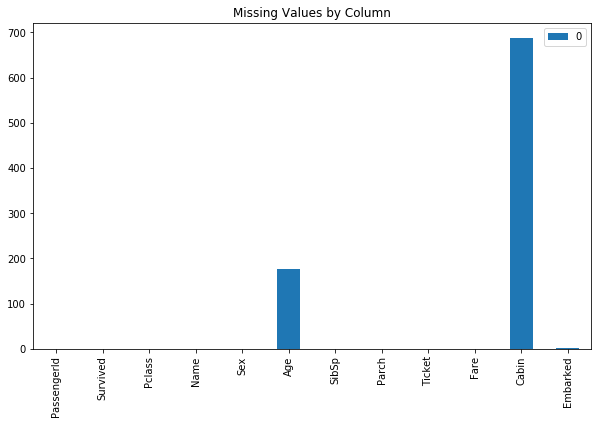

In [7]:
#Step 2: Cleaning the data
#Create a bar chart showing how many missing values are in each column.

missing_values = pd.DataFrame(titanic.isnull().sum())

missing_values.plot(kind='bar', title='Missing Values by Column', figsize=(10,6));

In [8]:
#get na values of all columns
titanic.isnull().sum() 

#The 'Cabin' column has the most missing values at 687 missing cells.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Delete all rows where Embarked is empty

titanic.dropna(subset=['Embarked'], how='any', inplace=True)

In [10]:
titanic.shape

(889, 12)

In [11]:
#Fill all empty cabins with NA

titanic['Cabin'].fillna(value= 'NA', inplace= True)

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S


In [13]:
#Feature extraction
#There are two columns that pertain to how many family members are on the boat for a given person. 
#Create a new column called FamilyCount which will be the sum of those two columns.

titanic['FamilyCount'] = titanic['Parch'] + titanic['SibSp']

In [14]:
#Reverends have a special title in their name. 
#Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.

In [15]:
r = []

for i in titanic['Name']:
    if 'Rev. ' in i:
        r.append(1)
    else:
        r.append(0)
titanic['IsReverend'] = r
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,0


In [16]:
#check if new values are assigned correctly

titanic.loc[titanic['Name'].str.contains('Rev'),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,NA,S,0,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,NA,S,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,NA,S,1,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NA,Q,0,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,NA,S,1,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NA,S,0,1


In [17]:
#In order to feed our training data into a classification algorithm,
#we need to convert our categories into 1's and 0's using pd.get_dummies.
#These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column.

In [18]:
# So I think out of those, the only object one that seems useful is maybe Embarked?
# Let's go ahead and make dummy variables of those

train['Embarked'] = train['Embarked'].astype('category')
train = pd.get_dummies(train, columns = ['Embarked'], drop_first = True)

NameError: name 'train' is not defined

In [19]:
#same for Sex column

m = []
f = []

for i in titanic['Sex']:
    if 'female' in i:
        f.append(1)
        m.append(0)
    else:
        f.append(0)
        m.append(1)

titanic['Sex_male'] = m
titanic['Sex_female']= f
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Sex_male,Sex_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,0,1,0


In [20]:
#Step 4: Exploratory analysis
#What was the survival rate overall?

titanic['Survived'].mean()

#38.24%

0.38245219347581555

In [21]:
#Which gender fared the worst? What was their survival rate?

titanic.groupby('Sex')['Survived'].mean()

#men faired the worst at just 18.89%


Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

In [22]:
#What was the survival rate for each Pclass?

titanic.groupby('Pclass')['Survived'].mean()

#1st Class ~ 63%, 2nd Class ~ 47%, 3rd Class ~ 24%

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [23]:
#Did any reverends survive? How many?

titanic.groupby('IsReverend')['Survived'].mean() 

#chances of survival if reverend is really bad

IsReverend
0    0.385051
1    0.000000
Name: Survived, dtype: float64

In [24]:
#What is the survival rate for cabins marked NA (Cabin unknown)

titanic.groupby(titanic['Cabin'] == 'NA')['Survived'].mean()

#About 29.9% chance of surviving if we don't know your cabin.

Cabin
False    0.663366
True     0.299854
Name: Survived, dtype: float64

In [25]:
#What is the survival rate for people whose Age is empty? # survival rate = number of people survived/total number of people * 100

#29.37853107344633 % surviving if we don't know your age

titanic_age = titanic.dropna(subset = ['Age'])
no_age_survival_rate = (titanic['Survived'].sum() - titanic_age['Survived'].sum()) / (titanic.shape[0] - titanic_age.shape[0]) * 100
print(no_age_survival_rate)

29.37853107344633


In [28]:

#What is the survival rate for each port of embarkation?

#Embarked location
#C    0.553571
#Q    0.389610
#S    0.336957


titanic.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [29]:
#What is the survival rate for children (under 12) in each Pclass?
#pclass = 1
titanic.groupby((titanic['Age'] < 12) & (titanic['Pclass']== 1))['Survived'].mean()

False    0.380791
True     0.750000
Name: Survived, dtype: float64

In [30]:
pclass=2
titanic.groupby((titanic['Age'] < 12) & (titanic['Pclass']== 2))['Survived'].mean()

False    0.370413
True     1.000000
Name: Survived, dtype: float64

In [31]:
pclass = 3
titanic.groupby((titanic['Age'] < 12) & (titanic['Pclass']== 3))['Survived'].mean()

False    0.381235
True     0.404255
Name: Survived, dtype: float64

In [32]:
#Did the captain of the ship survive? Is he on the list?

#Captain did not make it
titanic.loc[titanic['Name'].str.contains('Capt'), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Sex_male,Sex_female
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,1,0


In [33]:

#Of all the people that died, who had the most expensive ticket? How much did it cost?

#titanic.groupby(titanic['Survived']==0)['Fare'].max()

dead_and_fare = titanic.loc[(titanic['Survived']==0), :]
dead_and_fare.loc[dead_and_fare['Fare']==263, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Sex_male,Sex_female
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0,1,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5,0,1,0


In [34]:
#Does having family on the boat help or hurt your chances of survival?
#It seems like it helps but only up to a certain point. 
#Traveling with 3 family members really gave you the best shot at survival,
#while if you were trying to wrangle all 10 of your family members up, it didn't turn out so well :(


titanic.groupby('FamilyCount')['Survived'].mean()


FamilyCount
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [35]:
#Step 5: Plotting
#Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. 
#It's fine if a handful of charts are basic (Gender, Age, etc), 
#but what we're really looking for is something beneath the surface.


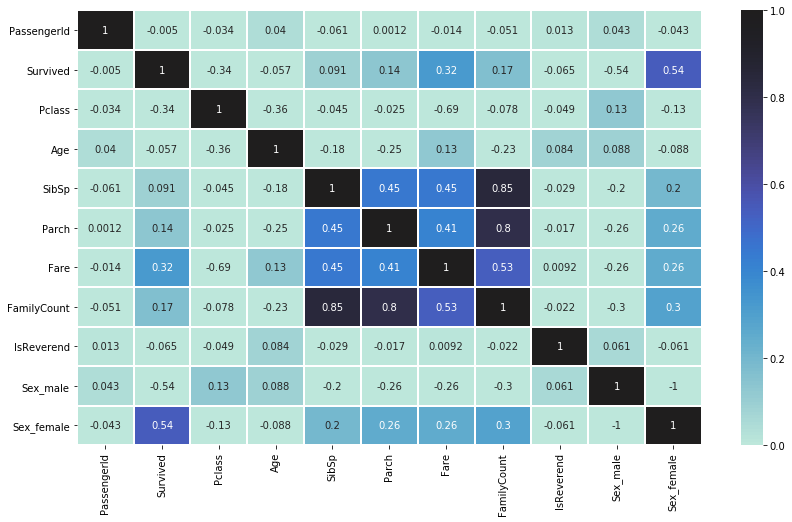

In [36]:
#Seeing if anything is correlated. 
#Looks like having more siblings is shockingly strongly correlated with having a bigger family count.

plt.figure(figsize=(14,8))
sns.heatmap(titanic.corr(method='spearman'), annot=True, linewidths=1, center=1, vmin=0, vmax=1);


In [37]:
#Wait... the most important question of all...
#WOULD I HAVE SURVIVED THE TITANIC?!

titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

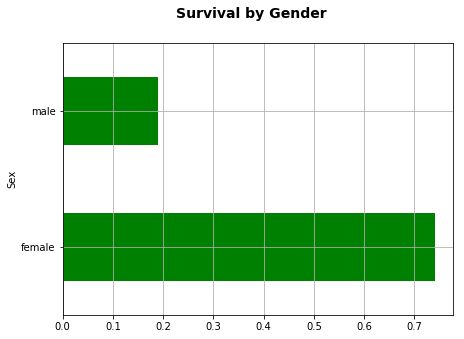

In [38]:
fig = plt.figure()
fig.suptitle('Survival by Gender', fontsize=14, fontweight='bold')

titanic.groupby('Sex')['Survived'].mean().plot(figsize=(7,5), kind='barh', grid=True, color='Green');

In [39]:
#13 dollars in 1912 is about 320 dollars today and...
#26 dollars in 1912 is about 640 dollars today,
#so I think I'd be squarely in the middle class

#my age is 24
second_class_and_male_and_age = (titanic['Sex'] == 'male') & (titanic['Pclass'] == 2) & (titanic['Age'] == 24)

titanic.groupby(second_class_and_male_and_age)['Survived'].mean()

False    0.383747
True     0.000000
Name: Survived, dtype: float64

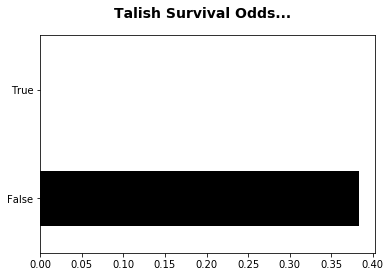

In [40]:
fig = plt.figure()
fig.suptitle('Talish Survival Odds...', fontsize=14, fontweight='bold')
titanic.groupby(second_class_and_male_and_age)['Survived'].mean().plot(kind='barh', color='Black');

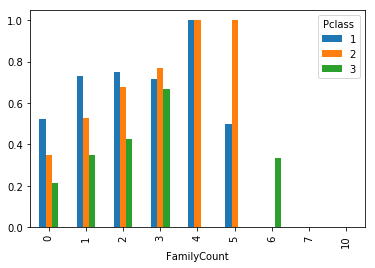

In [41]:
#Investigating some other stuff!

titanic.groupby(['FamilyCount', 'Pclass'])['Survived'].mean().unstack().plot(kind='bar');

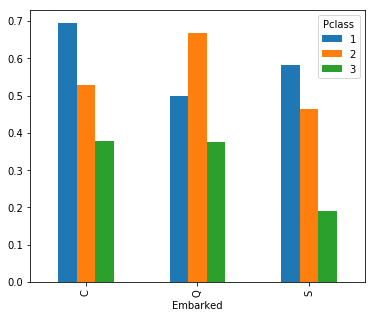

In [42]:

titanic.groupby(['Embarked', 'Pclass'])['Survived'].mean().unstack().plot(kind='bar', figsize=(6,5));

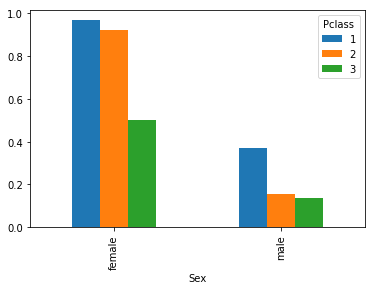

In [43]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack().plot(kind='bar');

In [44]:
titanic.to_csv('titanic_updated.csv', index=False)

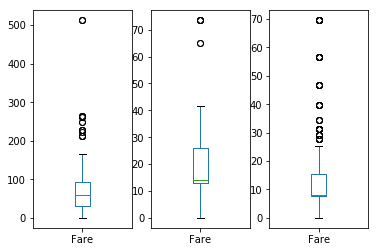

In [45]:
#check Fare prices on the basis of class

# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=1, ncols=3)

# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['Pclass'] == 1].plot(ax=axes[0], y='Fare', kind='box')

# Generate a box plot of the fare prices for the Second passenger class
titanic.loc[titanic['Pclass'] == 2].plot(ax=axes[1], y='Fare', kind='box')

# Generate a box plot of the fare prices for the Third passenger class
titanic.loc[titanic['Pclass'] == 3].plot(ax=axes[2], y='Fare', kind='box')

# Display the plot
plt.show()

In [46]:
# highest fare price

titanic['Fare'].max()

#people who bought the most expensive tickets


titanic.loc[titanic['Fare'] == 512.3292]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Sex_male,Sex_female
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NA,C,0,0,0,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,0,1,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0,0,1,0
